# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_letters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LettersIJL DS: 227 instances, 16 features


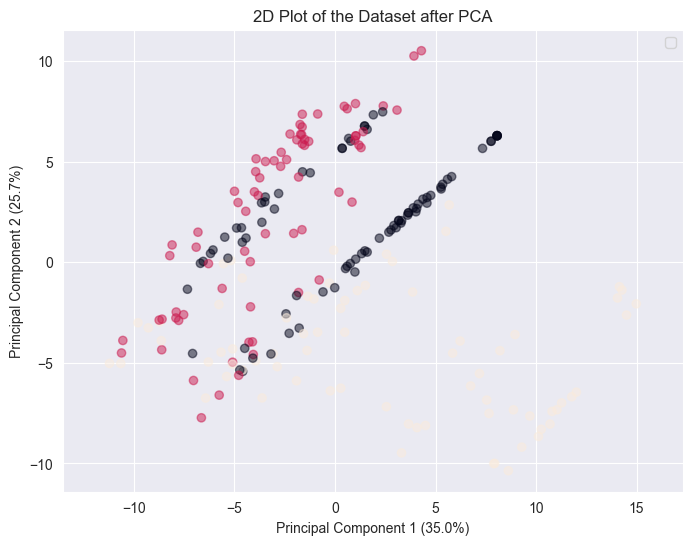

In [2]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"LettersIJL DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 4270.149129366722]
[2, 4162.600481889626]
[3, 4143.910723958546]
[4, 4137.938769105984]
[5, 4135.5027090947015]
[6, 4134.355544578969]
[7, 4133.768014445183]
[8, 4133.45137909443]
[9, 4133.274949958385]
[10, 4133.1742868645615]
[11, 4133.115805074122]
[12, 4133.081328151524]
[13, 4133.060747039156]
[14, 4133.048321870272]
[15, 4133.040739957315]
[16, 4133.036063908818]
[17, 4133.033148022492]
[18, 4133.031308236643]
[19, 4133.030132570628]
[20, 4133.02937087009]
[   0.         4133.02937087 4133.02937087]
[1, 4279.823436256933]
[2, 4165.38075723598]
[3, 4144.680707691871]
[4, 4138.155233674971]
[5, 4135.555445448437]
[6, 4134.359407229716]
[7, 4133.759130809578]
[8, 4133.44110420076]
[9, 4133.266440017584]
[10, 4133.168000987543]
[11, 4133.111407838722]
[12, 4133.078341218969]
[13, 4133.058751280422]
[14, 4133.047000053683]
[15, 4133.039867701895]
[16, 4133.035488270956]
[17, 4133.03276699724]
[18, 4133.03105467377]
[19, 4133.029962592532]
[20, 4133.0292559059235]
[1.00000000e+00 4

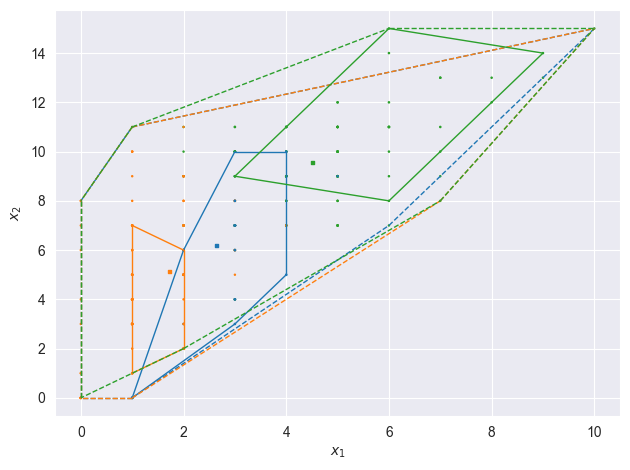

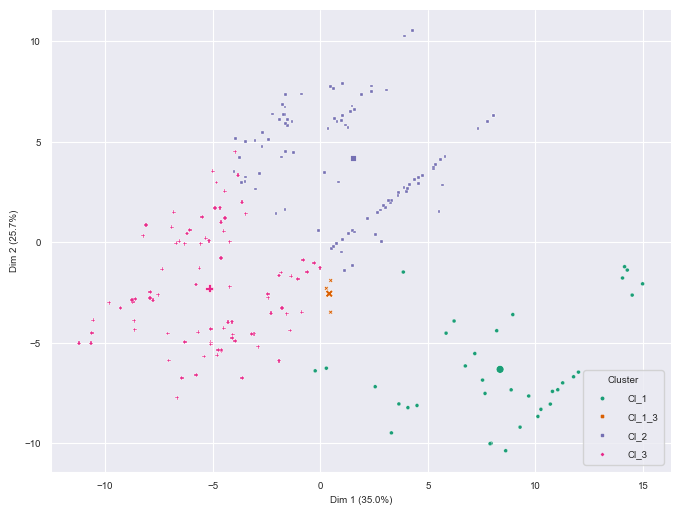

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.19515340295452677
Maximum Non-specificity value: 2.1648800038703304
Minimum Non-specificity value: 0.5306287315202269
Average Non-specificity value: 1.5208368923383775


In [11]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=10)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

In [17]:
# Feature weighted ECM clustering
c = 3
d = X.shape[1]
W = np.ones((c, d)) * (1/d)
# W = np.random.dirichlet(np.ones(X.shape[1]), c)
model = fwecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10)

Initial weight matrix: 
 [[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]]
[1, 16.79225549424653]
[2, 9.540024007596411]
[3, 8.72069763409206]
[4, 8.069882516592093]
[5, 7.506987197905521]
[6, 6.959229733941588]
[7, 6.744529576543221]
[8, 6.686808186171517]
[9, 6.6682133333286355]
[10, 6.661857101093362]
[11, 6.659596435986739]
[12, 6.658786515974007]
[13, 6.658497791121795]
[14, 6.65839547075451]
[15, 6.658359364664367]
[16, 6.658346658344274]
[17, 6.658342194173314]
[18, 6.658340627394424]
[0.         6.65834063 6.65834063]
Initial weight matrix: 
 [[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0

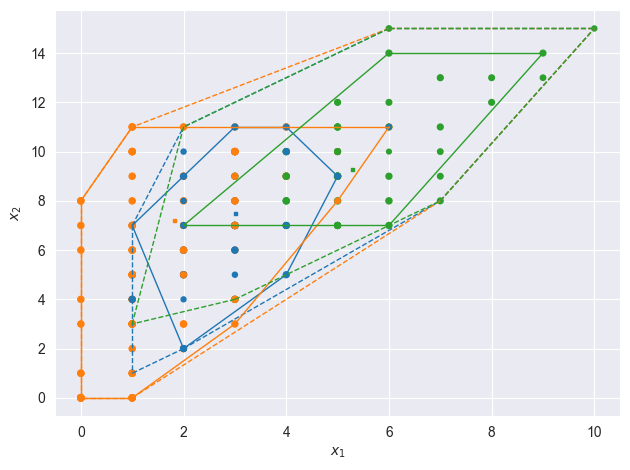

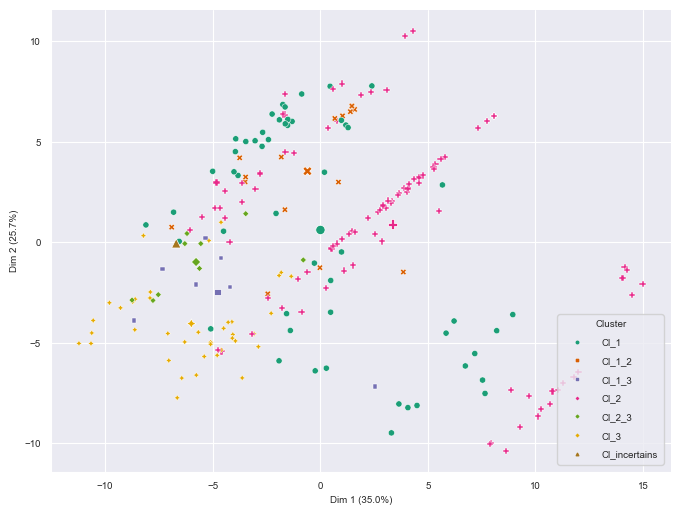

Weight matrix: 
 [[0.07311919 0.01512369 0.05912485 0.03069125 0.1144621  0.0086845
  0.02534106 0.01499939 0.03581035 0.00350601 0.01917983 0.01675932
  0.31373971 0.15225375 0.06743481 0.04977018]
 [0.01444964 0.00128323 0.00776453 0.00340767 0.02567562 0.003281
  0.00482132 0.00466486 0.00919882 0.0033637  0.00690916 0.01300161
  0.3168088  0.12684037 0.02127351 0.43725616]
 [0.0620935  0.03119905 0.10279276 0.05832283 0.07049317 0.08237895
  0.04513459 0.08388958 0.12218427 0.01986506 0.0887206  0.03571151
  0.04925852 0.10065799 0.01900945 0.02828817]]
Centers: 
 [[ 3.01364163  7.48557119  4.15293095  5.49472368  2.11152347  7.84419309
   4.61235795  3.12430324  6.50617264 10.50307757  3.62834926  8.6739908
   0.59938923  6.46165162  1.35882349  6.15620198]
 [ 1.8287662   7.21405114  2.49394934  5.22956488  1.05795029  7.816297
   6.05152929  2.65575749  5.01343881  8.35845647  4.38270608  7.9275838
   0.01430855  7.84697875  0.77414555  7.99587664]
 [ 5.29622283  9.25846429  6.22

In [18]:
ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
print(f"Centers: \n {model['g']}")

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)